## 3. Word Embeddings
---

To overcome previous limitations of traditional methods like BOW, tf-idf, we use Word Embeddings. Word embeddings are **dense vector representations** of words that map **similar words to similar vectors** in a continuous vector space. They are just a numerical representation of words, such as how colors can be represented using the RGB system.

## 3.1 One-Hot Encoding
---
A common representation of word embedding is **one-hot encoding**. This method encodes each word with a different vector. Each word has size equal to the vocabulary i.e the size of the vectors equals the number of words. Thus, if there are 1,000 words, the vectors have a size of 1 x 1,000. All values in the vectors are zeros except for a value 1, which differentiates each word representation. This results in **sparse vectors**

Example:  
If we have 5 words:

Sentence: "The pink horse is eating", we assign:

Vocabulary size = 5

Each word is a 1x5 vector (or 5-dimensional):

"The"= \[1, 0, 0, 0, 0\]
"pink"= \[0, 1, 0, 0, 0\]
"horse"= \[0, 0, 1, 0, 0\]
"is"= \[0, 0, 0, 1, 0\]
"eating"= \[0, 0, 0, 0, 1\]

> Pros:
- Simple to use

> Cons:
- When the vocabulary is too big, the size of the vectors will be huge -> **curse of dimensionality**
- Adding or removing words to the vocabulary -> the representation of all words will change.
- All vectors are orthogonal
    - **doesn’t encapsulate meaning**- no similarity
    - **can't capture semantic and syntactic information** between semantically close words like “horse” and “pony”

Note: When it's said that all vectors in a set are orthogonal, it means that every pair of vectors within that set is perpendicular to each other. More specifically, the dot product of any two distinct vectors in the set is equal to zero. This implies that the angle between each pair of vectors is 90 degrees. No similarity when dot product is zero.



## 3.2 Word2Vec
---

Word2Vec is a common technique used in NLP to capture syntactic and semantic relationship.

**Word2Vec** learns word embeddings using a **shallow neural network trained on large corpora**.

Similar words have similar word embeddings; this means that they are close to each other in terms of cosine distance in continuous vector space.

Eg:

king and queen might have similar vectors.

**Word relationships** (like king - man + woman = queen) can be captured using vector arithmetic.

### Features:
- Low-dimensional (e.g., 100–300)
- Capture **semantic relationships**
- Useful for clustering, classification, translation, etc.

---
### Two main algorithms to obtain a Word2Vec implementation:
- **CBOW (Continuous Bag of Words)**: Predicts a word from its surrounding context.
- **Skip-Gram**: Predicts the surrounding context from a given word.

### Context Window
Context window indicates the number of context words on each side of the center/target word. Can be even or odd but odd is preferred for better learning. The larger the context, the better the embedding. Larger context windows can capture broader dependencies but increase computational cost.

Eg: For a window size = 2, we generate (target, context) word pairs by sliding a window of ±2 words around each target word (excluding the target itself).

---
#### 3.2.1 CBOW

Predicts a word from its surrounding context.

Input: Context words
Output: Target word

Given: "[<start>, The, dog, jumps, over, the, fox, <end>]", with window size = 2

| Target to Predict    | Input Context               |
|----------------------|-----------------------------|
| \<start\>            | the, dog                    |
| The                  |\<start\>, dog, jumps        |
| dog                  | \<start\>, The, jumps, over |
| jumps                | The, dog, over, the         |
|over                  | dog, jumps, the, fox        |
|the                   | jumps, over, fox, \<end\>   |
| fox                  | over, the, \<end\>          |
| \<end\>              | The, fox                    |


---
#### 3.2.2 Skip-Gram

Skip-Gram does the reverse: it predicts context words given a target word.

Input: Target word
Output: Nearby context words


| Target (Input Word)  | Context Words (Output)      |
|----------------------|-----------------------------|
| <start>              | The, dog                    |
| The                  | <start>, dog, jumps         |
| dog                  | <start>, The, jumps, over   |
| jumps                | The, dog, over, the         |
| over                 | dog, jumps, the, fox        |
| the                  | jumps, over, fox, <end>     |
| fox                  | over, the, <end>            |
| <end>                | the, fox                    |

This model works especially well for smaller datasets and rare words.

Note: We do not differentiate based on distance — any word in the window is treated equally.

---





The architecture typically consists of an input layer, a hidden layer, and an output layer.

### **1. General Setup (for both models)**

- **Vocabulary Size (V):** Number of unique words in your vocabulary
- **Embedding Size (N):** Size of the word embedding vector (dense representation for each word)

So, for any word, we ll have:
- **One-hot vector**: shape `(V,)` (a vector with one `1` and `V-1` zeros).
- **Embedding vector**: shape `(N,)` (dense vector with learned values).

#### **Network Weights:**

1. **Embedding Matrix (W1)**: Converts one-hot vector to embedding.
   - Shape: `(V, N)` — maps the one-hot vector to the `N`-dimensional embedding.
   
2. **Output Weights (W2)**: Projects embedding back to vocabulary space (for prediction).
   - Shape: `(N, V)` — projects the embedding back to `V`-dimensional space.

---

### **2. CBOW (Continuous Bag of Words)**

- Input Layer: It represents the context words encoded as one-hot vectors.
- Hidden Layer: This layer processes the input and performs non-linear transformations to capture the semantic relationships between words.
- Output Layer: It produces a probability distribution over the vocabulary, with each word assigned a probability of being the target word given its context.
- Loss - Cross entropy Loss between predicted distribution and true target
- True Target - One hot encoding of the true word

#### Step-by-step with Shapes:

1. **Input:** Context words, each represented as **one-hot vectors**. `(C, V)`
   - Input context size: `C` (number of context words, e.g., window size).
   - **Shape of each one-hot vector:** `(V,)`

2. **Convert context words to embeddings:**
   - For each context word, multiply by the **Embedding Matrix (W1)**:
     - **Shape of context embedding (for each word):** `(N,)` (dense embedding)
     - **Embedding matrix (W1) shape:** `(V, N)`  
   
3. **Average the context embeddings:**
   - **Average shape:** `(N,)` (averaged over `C` context words)

4. **Pass the averaged context vector through the **Output Weights (W2)** to predict target word:**
   - **Shape of output from W2:** `(V,)` (prediction vector)
   - This is the probability distribution over all words in the vocabulary.

5. **Loss Function:**
   - Cross-entropy loss: comparing predicted vector with the true one-hot target vector. `(V,)`

---

### **3. Skip-Gram**

- Input Layer: It represents the target word encoded as one-hot vector.
- Hidden Layer: This layer processes the input and performs non-linear transformations to capture the semantic relationships between words.
- Output Layer: It produces a probability distribution over the vocabulary, with each word assigned a probability of being the context word given its target.
- Loss - Cross entropy Loss between predicted distribution and true target
- True Target - One hot encoding of the true context words

#### Step-by-step with Shapes:

1. **Input:** Target word represented as a **one-hot vector**.
   - **Shape of one-hot vector:** `(V,)`

2. **Convert target word to embedding:**
   - Multiply target one-hot vector by the **Embedding Matrix (W1)**:
     - **Shape of the target embedding:** `(N,)`
     - **Embedding matrix (W1) shape:** `(V, N)`

3. **For each context word** (within the window):
   - Pass the target embedding through **Output Weights (W2)**:
     - **Shape of output (for each context prediction):** `(V,)` (predicted probability for each word)
   
4. **Loss Function:**
   - Cross-entropy loss for each context word.

---

### **4. Network Shapes Summary**

| Step                        | CBOW (Context → Target)           | Skip-Gram (Target → Context)      |
|-----------------------------|-----------------------------------|-----------------------------------|
| **Input (One-hot Vector)** | `(C, V)` (Context words)          | `(V,)` (Target word)              |
| **Embedding Matrix (W1)** | `(V, N)`                          | `(V, N)`                          |
| **Context Embeddings** | `(C, N)` (after embedding lookup) | `(1, N)` (after embedding lookup) |
| **Average Embedding** | `(1, N)` or `(N,)`               | N/A                               |
| **Output Weights (W2)** | `(N, V)`                          | `(N, V)`                          |
| **Output (Prediction after softmax output layer)** | `(V,)` (Predicted target)         | `(C, V)` (Predicted context words)|
| **Target Dimension for Loss** |	`(V,)` (One-hot encoded target)	| `(V,)` per context word (One-hot encoded) or `(C, V)` for all context words
| **Loss Function** | Cross-entropy loss for 1 word     | Cross-entropy loss for multiple context words |

#### CBOW:

- **V = 1000** (vocabulary size)
- **N = 50** (embedding size)
- **C = 4** (context size)

1.  **Input Context** (4 words): Shape = `(C, V)` → `(4, 1000)`
2.  **Embedding Matrix (W1)**: Shape = `(1000, 50)`
3.  **Context Embeddings** (4 words): Shape = `(4, 50)`
4.  **Average Embedding**: Shape = `(1, 50)` or `(50,)`
5.  **Output Weights (W2)**: Shape = `(50, 1000)`
6.  **Output**: Shape = `(1000,)`

#### Skip-Gram:

- **V = 1000** (vocabulary size)
- **N = 50** (embedding size)
- **C = 4** (context size)

1.  **Input Target** (1 word): Shape = `(V,)` → `(1000,)`
2.  **Embedding Matrix (W1)**: Shape = `(1000, 50)`
3.  **Target Embedding**: Shape = `(1, N)` or `(50,)`
4.  **Output Weights (W2)**: Shape = `(N, V)`
5.  **Output** (for each context word): Shape = `(C, V)` → `(4, 1000)`



### **Key Takeaway**:

- **CBOW**: Learns a **single** embedding

### **Embedding Lookup**

Embedding lookup is the process of retrieving the dense vector representation (the word embedding) of a word from an embedding matrix. Here's how it works in the context of Word2Vec:

- Embedding Matrix (W1): This matrix has a shape of (V, N), where V is the vocabulary size and N is the embedding dimension (the size of the dense vector representing each word). Each row in this matrix corresponds to the embedding vector of a specific word in the vocabulary. The index of the row corresponds to the index of the word in the vocabulary.

- Input Word: When a word is fed into the Word2Vec model, it's typically represented as a one-hot encoded vector of size (V,). In this vector, all elements are 0 except for the element at the index corresponding to the word, which is 1.

- The "Lookup": Instead of performing a full matrix multiplication between the one-hot vector and the embedding matrix, which would be computationally inefficient, we perform a direct lookup. The index of the '1' in the one-hot vector directly selects the corresponding row from the embedding matrix W1.

- Output: The selected row is the embedding vector of the input word, with a shape of (1, N) or simply (N,).

- Analogy: Think of the embedding matrix as a dictionary where the keys are the word indices and the values are their corresponding embedding vectors. The one-hot encoded input acts as a way to select the correct "key" to retrieve the "value" (the embedding vector).

In summary, embedding lookup is an efficient way to get the dense vector representation of a word by using its index (from the one-hot encoding) to directly access the corresponding row in the embedding matrix. This avoids the unnecessary computations of a full matrix multiplication with a sparse one-hot vector

## 6. Measuring Word Similarity (Cosine Similarity)

Once trained, Word2Vec ensures that similar words are closer in vector space. To measure closeness i.e to compare vectors, we often use cosine similarity:


\begin{equation}
\cos(\theta) = \frac{\vec{A} \cdot \vec{B}}{\|\vec{A}\| \|\vec{B}\|}
\end{equation}


Where A and B are word vectors. Values close to 1 mean high similarity. Cosine similarity ranges from -1 (opposite) to 1 (similar). This helps find synonyms, analogies, etc.

---



## 7. Beyond Word2Vec

| Method       | Description                                                                 |
|--------------|-----------------------------------------------------------------------------|
| **GloVe**    | Global Vectors for Word Representation; trained on word co-occurrence      |
| **FastText** | Extends Word2Vec by representing words as a bag of character n-grams       |
| **BERT**     | Contextual embeddings using transformers; different vector for each usage  |
| **ELMo**     | Contextual embeddings using LSTMs                                           |

---



## Summary Table

| Method        | Captures Meaning? | Dense Vectors | Contextual? | Pros                       | Cons                         |
|---------------|-------------------|----------------|-------------|----------------------------|------------------------------|
| BoW           | ❌                | ❌             | ❌          | Simple, easy to compute    | Sparse, ignores order        |
| TF-IDF        | ⚠️ Partial         | ❌             | ❌          | Weights important terms    | Still no meaning or context  |
| One-Hot       | ❌                | ❌             | ❌          | Simple                     | High-dimensional, meaningless|
| Word2Vec      | ✅                | ✅             | ❌          | Learns meaning             | One vector per word          |
| FastText      | ✅                | ✅             | ❌          | Handles subwords/typos     | No deep context              |
| BERT/ELMo     | ✅                | ✅             | ✅          | Deep contextual meaning    | Heavier models               |

---


In [ ]:
# Sample Corpus
corpus = [
    "The cat sat on the mat",
    "The dog barked at the mailman",
    "The cat meowed loudly",
]

In [ ]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(corpus)
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,at,barked,cat,dog,loudly,mailman,mat,meowed,on,sat,the
0,0,0,1,0,0,0,1,0,1,1,2
1,1,1,0,1,0,1,0,0,0,0,2
2,0,0,1,0,1,0,0,1,0,0,1


In [ ]:
X_bow.shape

(3, 11)

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(corpus)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
tfidf_df

,at,barked,cat,dog,loudly,mailman,mat,meowed,on,sat,the
0,0.000000,0.000000,0.341015,0.000000,0.000000,0.000000,0.448394,0.000000,0.448394,0.448394,0.529657
1,0.430518,0.430518,0.000000,0.430518,0.000000,0.430518,0.000000,0.000000,0.000000,0.000000,0.508542
2,0.000000,0.000000,0.444514,0.000000,0.584483,0.000000,0.000000,0.584483,0.000000,0.000000,0.345205


In [ ]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

data = [["cat"], ["dog"], ["mouse"]]
encoder = OneHotEncoder(sparse_output=False)
one_hot = encoder.fit_transform(data)
pd.DataFrame(one_hot, columns=encoder.get_feature_names_out())

,x0_cat,x0_dog,x0_mouse
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [ ]:
!pip install gensim

In [ ]:
# Word2Vec Training
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Tokenize corpus
tokenized_corpus = [word_tokenize(sent.lower()) for sent in corpus]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=50, window=2, min_count=1, sg=0)  # CBOW

"""
In `gensim`, use `sg=0` for CBOW and `sg=1` for Skip-Gram.
"""

# Display vector
model.wv['cat']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


array([-0.01631583,  0.0089916 , -0.00827415,  0.00164907,  0.01699724,
       -0.00892435,  0.009035  , -0.01357392, -0.00709698,  0.01879702,
       -0.00315531,  0.00064274, -0.00828126, -0.01536538, -0.00301602,
        0.00493959, -0.00177605,  0.01106732, -0.00548595,  0.00452013,
        0.01091159,  0.01669191, -0.00290748, -0.01841629,  0.0087411 ,
        0.00114357,  0.01488382, -0.00162657, -0.00527683, -0.01750602,
       -0.00171311,  0.00565313,  0.01080286,  0.01410531, -0.01140624,
        0.00371764,  0.01217773, -0.0095961 , -0.00621452,  0.01359526,
        0.00326295,  0.00037983,  0.00694727,  0.00043555,  0.01923765,
        0.01012121, -0.01783478, -0.01408312,  0.00180291,  0.01278507],
      dtype=float32)

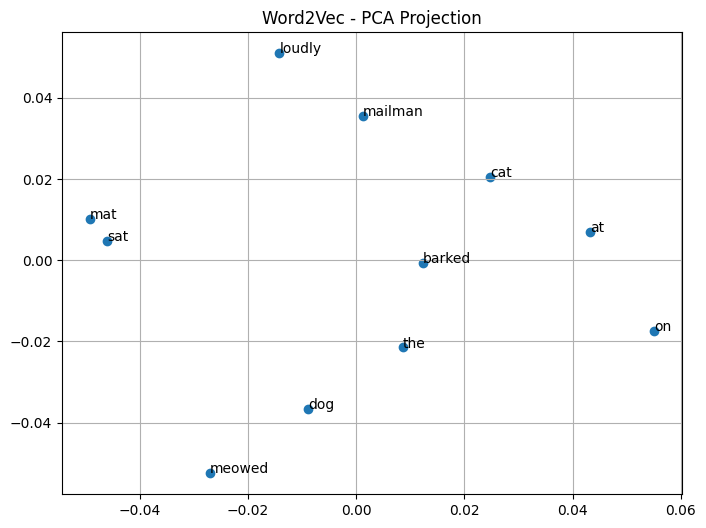

In [ ]:
# Word2Vec Visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(model.wv.key_to_index.keys())
word_vectors = [model.wv[word] for word in words]

# Reduce dimensionality
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title("Word2Vec - PCA Projection")
plt.grid(True)
plt.show()

In [ ]:
# Cosine Similarity
from numpy import dot
from numpy.linalg import norm

vec1 = model.wv['cat']
vec2 = model.wv['dog']

cos_sim = dot(vec1, vec2) / (norm(vec1) * norm(vec2))
cos_sim

-0.17547825